<a href="https://colab.research.google.com/github/Hrotich/DIABETE-PREDICTION/blob/main/DIABETES_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Defining the question





## a.) Specifying the question




Given health indicators such as physical health, cholestrol level, BMI(body mass index), alcohol consumption and other variables provided in the dataset, we would like to build a predictive model that determines if a patient has diabetes or not. Basically,we would like to identify health indicators that are most predictive of diabetes risk.


## b.) Defining the metrics of success

Our success will be determined by the model that achieves an accuracy score of over 80%

##c.) Understanding the context
- Diabetes is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy.It is a serious, chronic disease that occurs either when the pancreas does not produce enough insulin (a hormone that regulates blood sugar, or glucose), or when the body cannot effectively use the insulin it produces. 
- Complications like heart disease, vision loss, lower-limb amputation, and kidney disease are associated with chronically high levels of sugar remaining in the bloodstream for those with diabetes. While there is no cure for diabetes, strategies like losing weight, eating healthily, being active, and receiving medical treatments can mitigate the harms of this disease in many patients. Early diagnosis can lead to lifestyle changes and more effective treatment, making predictive models for diabetes risk important tools for public and public health officials.

- The scale of this problem is also important to recognize. The Centers for Disease Control and Prevention has indicated that as of 2018, 34.2 million Americans have diabetes and 88 million have prediabetes. Furthermore, the CDC estimates that 1 in 5 diabetics, and roughly 8 in 10 prediabetics are unaware of their risk. While there are different types of diabetes, type II diabetes is the most common form and its prevalence varies by age, education, income, location, race, and other social determinants of health. Much of the burden of the disease falls on those of lower socioeconomic status as well. Diabetes also places a massive burden on the economy, with diagnosed diabetes costs of roughly 327 billion dollars and total costs with undiagnosed diabetes and prediabetes approaching 400 billion dollars annually.

- The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984.  This original dataset contains responses from 441,455 individuals and has 330 features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses.
Diabetes is an important public health problem, one of four priority noncommunicable diseases(NCDs) targeted for action by world leaders. Both the number of cases and the prevalence of diabetes have been steadily increasing over the past few decades.

- Globally, an estimated 422 million adults were living with diabetes in 2014, compared to 108 million in 1980.
The global prevalence (age-standardized) of diabetes has nearly doubled since 1980, rising from 4.7% to 8.5% in the adult population. This reflects an increase in associated risk factors such as being overweight or obese. Over the past decade, diabetes prevalence has risen faster in low- and middle-income countries than in high-income countries.

## d.) Experimental Design

This project will involve review and cleaning of the dataset while performing exploratory data analysis of the dataset, descriptive statistics, regression, decision trees, SVMs, KNNs, Naive Bayes and Neural Networks. We will also do model optimization using different training and testing parameters with other optimization techiques that are fit for the model used. We will do hyperparameter tuning to obtain the best estimator and finally provide further recomendation on how to improve the classifier into the best model.

## e.) Data Relevance

The data we have is relevant for analysis since it is from Behavioral Risk Factor Survaillance Survailance System (BRFSS2015). It was established in the year 1984 to **collect** data about USA residents on their health related risk behaviours, chronic conditions and use of preventive services.
Dataset used can be found here: https://www.kaggle.com/alexteboul/diabetes-health-indicators-dataset?select=diabetes_binary_health_indicators_BRFSS2015.csv which is a dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_binary has 2 classes; 0 for no diabetes, and 1 for diabetes. Other variables include:

- HighBP
0 = no high BP, 1 = high BP

- HighChol
0 = no high cholesterol ,1 = high cholesterol

- CholCheck
0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years

- BMI
Body Mass Index

- Smoker
Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no,1 = yes

- Stroke
Have you ever had a stroke. 0 = no,1 = yes

- HeartDiseaseorAttack
coronary heart disease (CHD) or myocardial infarction (MI) 0 = no,1 = yes

- PhysActivity
physical activity in past 30 days - not including job 0 = no,1 = yes

- Fruits
Consume Fruit 1 or more times per day 0 = no ,1 = yes

- Vegetables
Consume vegetables 1 or more times per day 0 = no ,1 = yes

- DiffWalk
Shows whether a respondent takes a walk in a day or not;0 = no ,1 = yes

- Sex i.e gender
where 0 = women, 1 = men

- age :1 Age 18 to 24,
2 Age 25 to 29,
3 Age 30 to 34,
4 Age 35 to 39,
5 Age 40 to 44,
6 Age 45 to 49,
7 Age 50 to 54,
8 Age 55 to 59,
9 Age 60 to 64,
10 Age 65 to 69,
11 Age 70 to 74,
12 Age 75 to 79,
13 Age 80 or older,


#2.) Reading the Data

Importing libraries 

In [32]:
import pandas as pd
import numpy as np#For working with numbers 
from scipy import stats#for statistic
import seaborn as sns# for visualization 
import matplotlib.pyplot as plt#for plotting 
%matplotlib inline

from sklearn.preprocessing import LabelEncoder#for encoding 
from sklearn.preprocessing import StandardScaler#for scaling 
from sklearn.model_selection import KFold, cross_val_score, train_test_split, StratifiedKFold, GridSearchCV

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.naive_bayes import GaussianNB
plt.style.use("Solarize_Light2")

# from google.colab import data_table
# data_table.enable_dataframe_formatter()

import warnings
warnings.filterwarnings("ignore")#to remove warning on deprecated lines of codes 

Loading the dataset


In [33]:
df = pd.read_csv("/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")


Exploring the dataset

In [34]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [35]:
df.tail()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
70691,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


checking for the features in the dataset

In [36]:
# Cheking the shape of the dataset
print('shape of the dataset: ',df.shape)
print('The dataset has ',df.shape[0],' rows and ',df.shape[1], 'columns.')

shape of the dataset:  (70692, 22)
The dataset has  70692  rows and  22 columns.


In [37]:
#checking for the dataset datatypes and information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

- All the variables are continous.

# 3.) Data preparation


In [38]:
# checking for duplicate data
df.duplicated().sum()

1635

- The number of duplicated data as observed above will be dropped in order to improve the accuracy of our model

In [39]:
# dropping duplicated values
df = df.drop_duplicates()
df.duplicated().sum()
# duplicates have been removed

0

In [40]:
# ccheck data size after
df.shape

(69057, 22)

In [41]:
# converting the columns values from float to integer
df = df.astype(int)
df.dtypes

Diabetes_binary         int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object

In [42]:
# checking for anomalies
for i in df:
  print(str(i),':', df[i].unique())

Diabetes_binary : [0 1]
HighBP : [1 0]
HighChol : [0 1]
CholCheck : [1 0]
BMI : [26 28 29 18 31 32 27 24 21 58 30 20 22 38 40 25 36 47 19 37 41 23 34 35
 42 17 33 44 15 52 69 56 45 39 92 53 98 50 46 79 48 16 63 72 54 49 68 43
 84 73 76 55 51 75 57 60 12 77 82 67 71 61 14 81 59 86 13 87 65 95 89 62
 64 66 85 70 83 80 78 74]
Smoker : [0 1]
Stroke : [0 1]
HeartDiseaseorAttack : [0 1]
PhysActivity : [1 0]
Fruits : [0 1]
Veggies : [1 0]
HvyAlcoholConsump : [0 1]
AnyHealthcare : [1 0]
NoDocbcCost : [0 1]
GenHlth : [3 1 2 4 5]
MentHlth : [ 5  0  7  3  4  2 30 20  1 15 10 25 14 28  6 29 26 12 16 22 13  8  9 21
 18 17 27 24 23 11 19]
PhysHlth : [30  0 10  3  6  4 15  1  2 14  7 25 21 20  5  8 22 23 29 12 18 28 26 24
 27 11 13 16 17  9 19]
DiffWalk : [0 1]
Sex : [1 0]
Age : [ 4 12 13 11  8  1  6  3  7 10  9  5  2]
Education : [6 5 4 3 2 1]
Income : [8 7 6 3 4 1 5 2]


In [43]:
# checking for count of unique values
print('Number of unique values:\n\n',df.nunique())
df1 = pd.DataFrame(data = df.nunique(),columns=['Number of unique values'])
df1
df2 = df1[df1['Number of unique values'] == 2]

print('\n\nDataframe comprising binary elements:',len(df2))
df2 # Dataframe containing variables and their count of unique values


Number of unique values:

 Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64


Dataframe comprising binary elements: 15


,Number of unique values
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2
Veggies,2


- 15 out of 22 variables are binary 

In [44]:
#checking for null value
df.isna().sum() 

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

- There are no null values meaning there's no missing data in our dataset. 

In [45]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

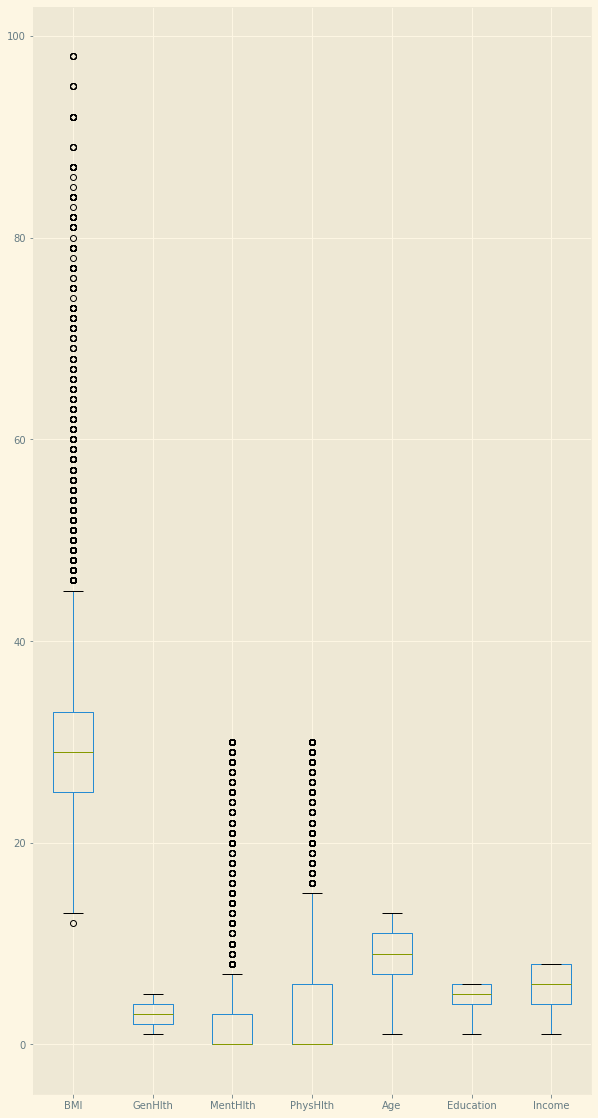

In [46]:
# Checking for outliers and dropping the binary variables
cols = df[['BMI','GenHlth','MentHlth', 'PhysHlth','Age', 'Education','Income']]

plt.figure(figsize=(10,20))
cols.boxplot(figsize=(10, 10), fontsize=10)


- BMI has the most outliers. General,Physical and Mental health also have outliers.
- However we shall not get rid of them as they play a huge part in finding our solution.

#4.) Exploratory Data Analysis

####a). Univariate analysis

In [47]:
#checking for summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,69057.0,0.508232,0.499936,0.0,0.0,1.0,1.0,1.0
HighBP,69057.0,0.571224,0.494905,0.0,0.0,1.0,1.0,1.0
HighChol,69057.0,0.531329,0.499021,0.0,0.0,1.0,1.0,1.0
CholCheck,69057.0,0.974803,0.156723,0.0,1.0,1.0,1.0,1.0
BMI,69057.0,29.955834,7.147972,12.0,25.0,29.0,33.0,98.0
Smoker,69057.0,0.481935,0.499677,0.0,0.0,0.0,1.0,1.0
Stroke,69057.0,0.063643,0.244118,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,69057.0,0.150875,0.357930,0.0,0.0,0.0,0.0,1.0
PhysActivity,69057.0,0.696483,0.459780,0.0,0.0,1.0,1.0,1.0
Fruits,69057.0,0.605659,0.488712,0.0,0.0,1.0,1.0,1.0


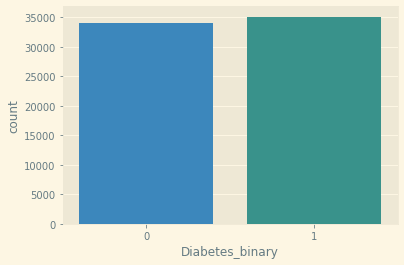

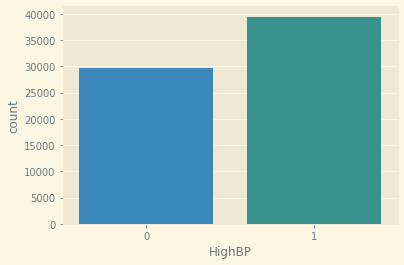

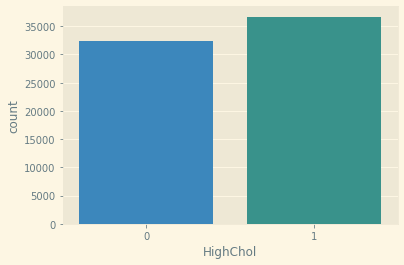

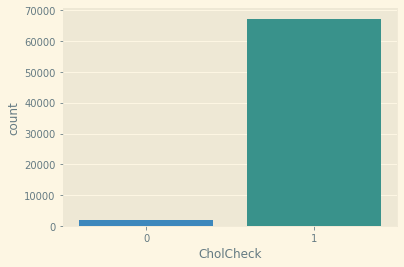

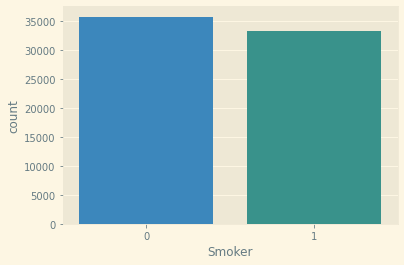

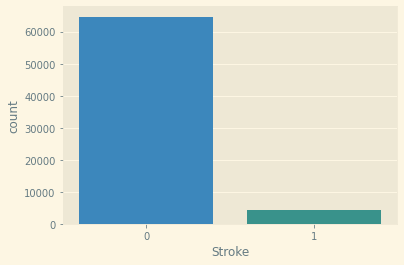

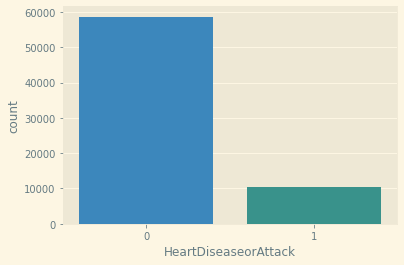

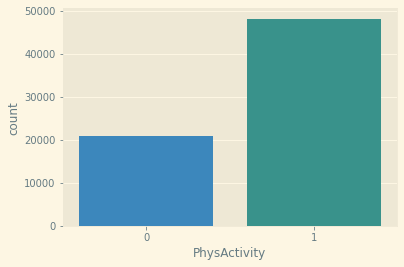

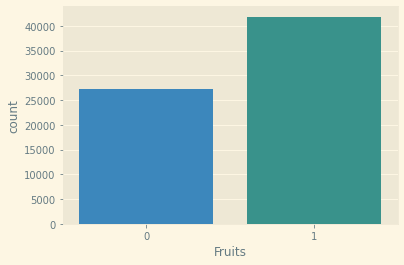

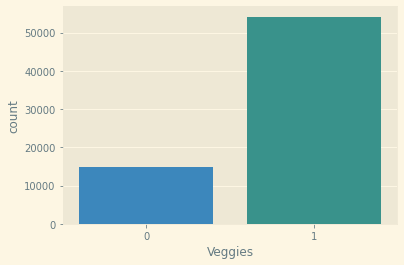

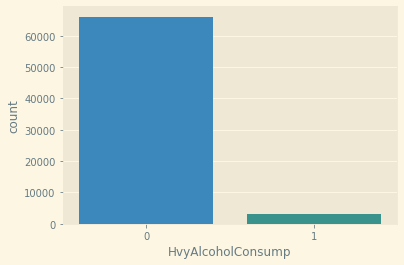

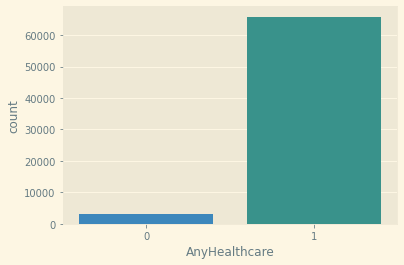

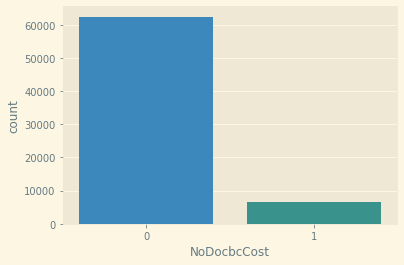

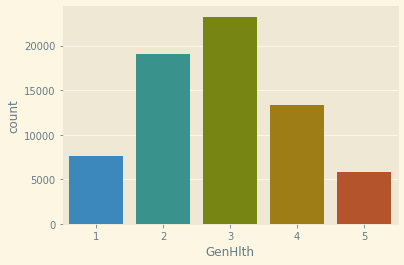

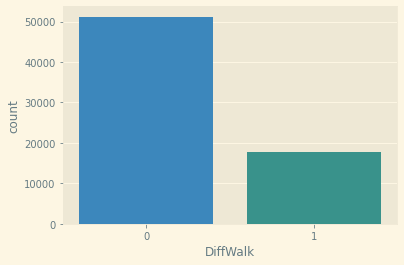

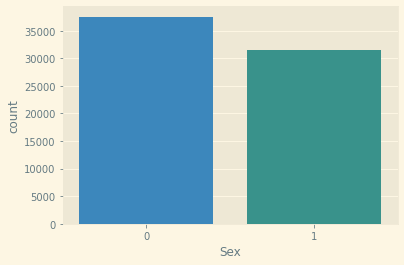

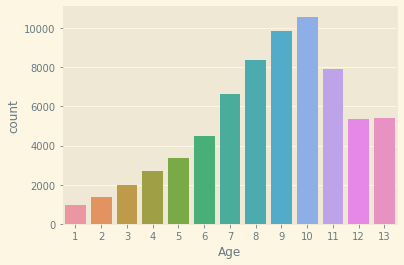

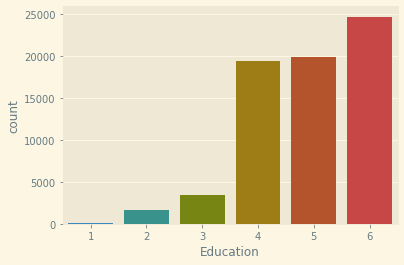

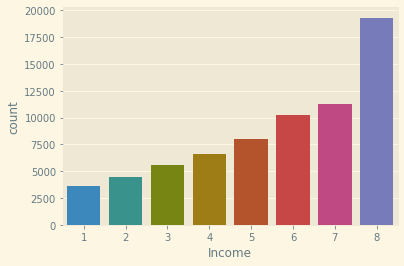

In [48]:
# displaying the frequency of different variables
df3 = df.drop(['BMI','MentHlth','PhysHlth'],axis=1)
for a in df3:
  sns.countplot(df[a])
  plt.show()

- The charts show that there are more people without diabetes(binary 0) in our dataset compared to those with it(binary 1)
- There's a higher number of people with HighBP compared to those without. Same goes for HighChol,Smoker,Stroke,Heart disease or attack,heavy alcohol consumption,no doc cost,diff walk and sex variables.
- There's also a higher number of people who have had their cholesterol levels checked compared to those who haven't. 
- There's a higher number of people who do physical activities compared to those who don't. Same goes for those that eat fruits and vegetables and possessing any form of healthcare.
- Respondents also seem to show a case of somewhat poor general health as most fall under a score of 2 out of 5.
- Most respondents have the highest education and income in our dataset.

- most respondents are  within the age  bracket of 10 Age (65 to 69)

Text(0.5, 1.0, 'BMI Distribution')

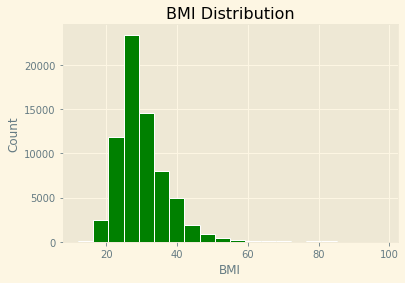

In [49]:
# determining the distribution of BMI
# plt.figure(figsize=(10,10))
plt.hist(df.BMI, bins = 20, color='green',edgecolor='white')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('BMI Distribution')

- The histogram shows that most people's BMI ranges between 20 and 40.
- BMI of a healthy person ranges 18.5—24.9 ,while that of an underweight person falls below 18.5, that of an overweight person ranges from 25.0-29.9 and that of an obese person starts from 30 onwards.
- The mean of 28.687507 from our summary statistics shows that their BMI falls within the healthy range

Text(0, 0.5, 'Count')

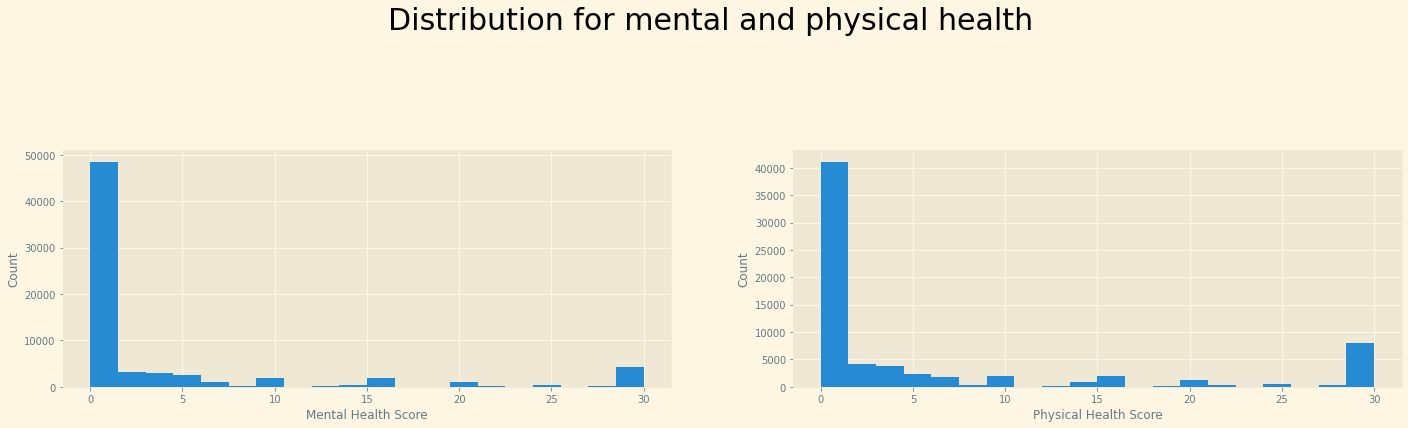

In [50]:
# determining the distribution of BMI,mental health and physical health variables
df4 = df[['MentHlth','PhysHlth']]

plt.figure(figsize=(24,20))
plt.suptitle('Distribution for mental and physical health',fontsize=30)
plt.subplot(4, 2, 1)
fig = df4.MentHlth.hist(bins=20)
fig.set_xlabel('Mental Health Score')
fig.set_ylabel('Count')


plt.subplot(4, 2, 2)
fig = df4.PhysHlth.hist(bins=20)
fig.set_xlabel('Physical Health Score')
fig.set_ylabel('Count')

- The Mini-Mental State Examination (MMSE) is a test that health care professionals give to someone who may have dementia(decline in mental ability that is severe enough to affect daily life). The MMSE is not the only test given to find out if someone has dementia, but is a test that is often used by health care providers to help measure short- and long-term memory, concentration and understanding of instructions. 
The MMSE has a maximum score of 30 points. The scores are generally grouped as follows:

25-30 points: normal cognition
21-24 points: mild dementia
10-20 points: moderate dementia
9 points or lower: severe dementia

- The distribution of mental health is concentrated around zero meaning many respondents were not mentally healthy.
- The physical health distribution shows a higher number of respondents having a score below 10 showing that most people are not physically healthy.

####b.) Bivariate Analysis

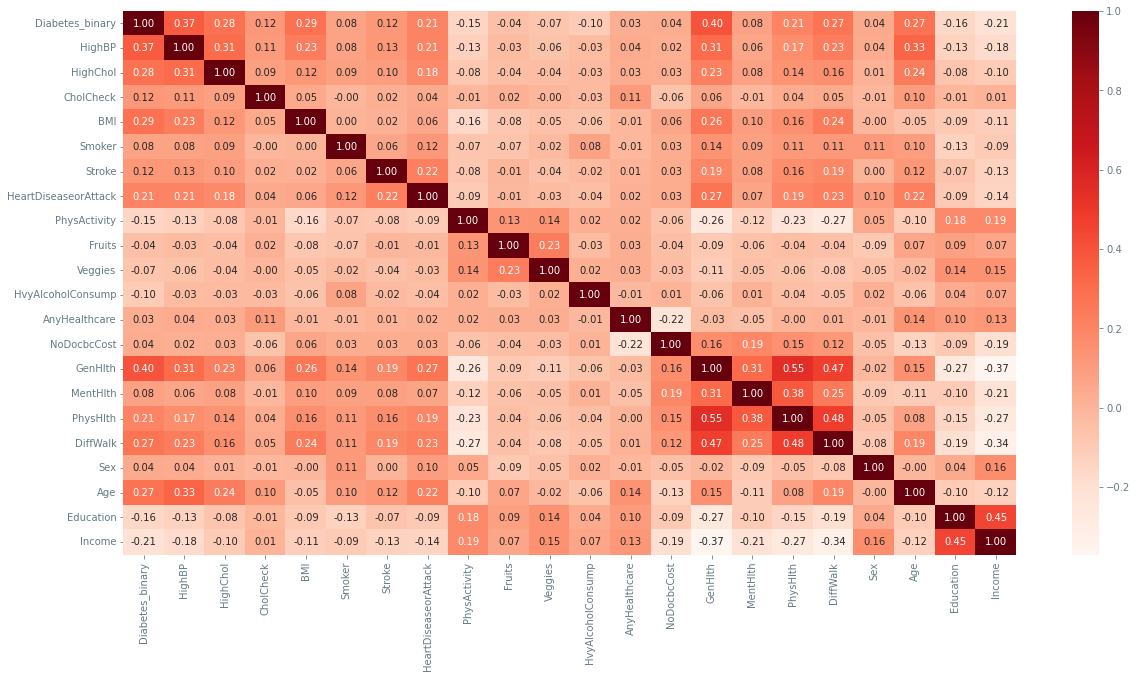

In [20]:
# creating a correlation matrix using heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap="Reds",fmt=".2f");
plt.show()

- From our matrix,we consider only correlations that are above 0.2 for Diabetes binary. Diabetes binary has a weak positive relationship with high BP(0.25),BMI(0.21),GenHlth(0.28) and diffwalk(0.21). Research studies have shown that walking can be beneficial in bringing down blood glucose and therefore improving diabetes control. 
- There's a strong positive correlation between genhelth and physhlth(0.52)
- There's positive correlation between genhelth and diffwalk(0.45)
- There's positive correlation between physhlth and diffwalk(0.47)
- There's positive correlation between education and income(0.42)

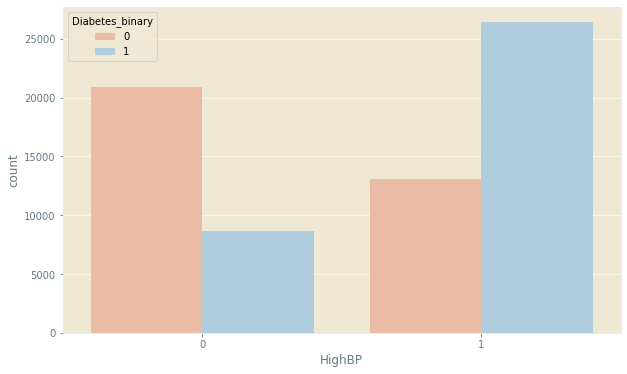

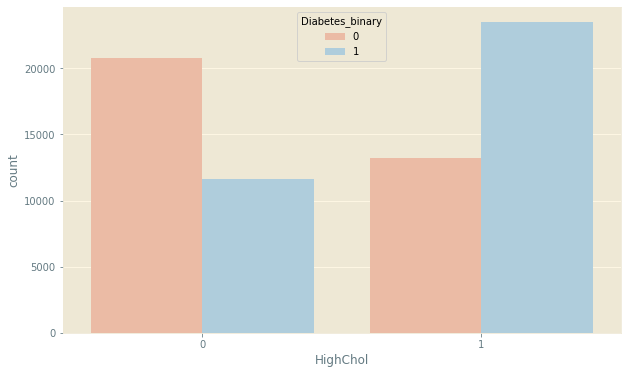

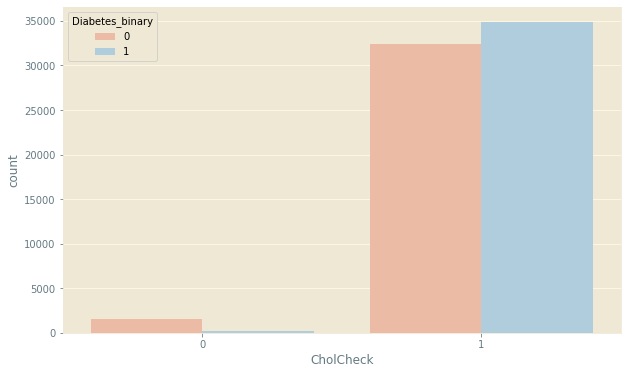

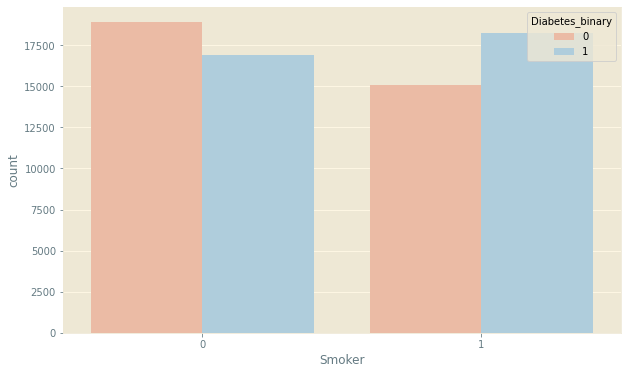

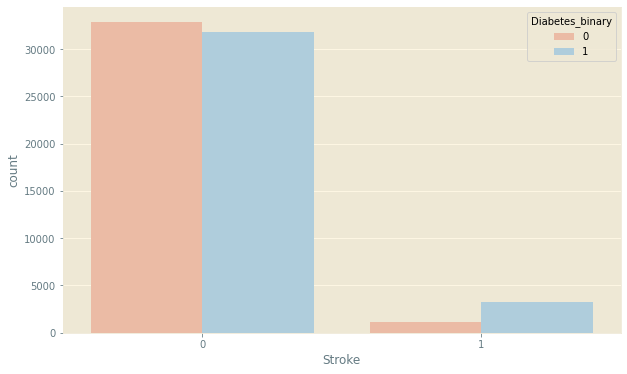

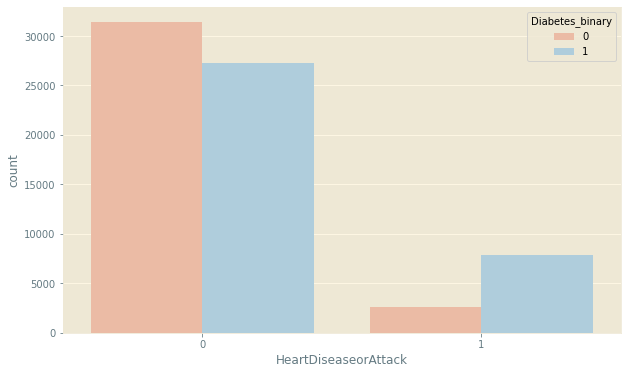

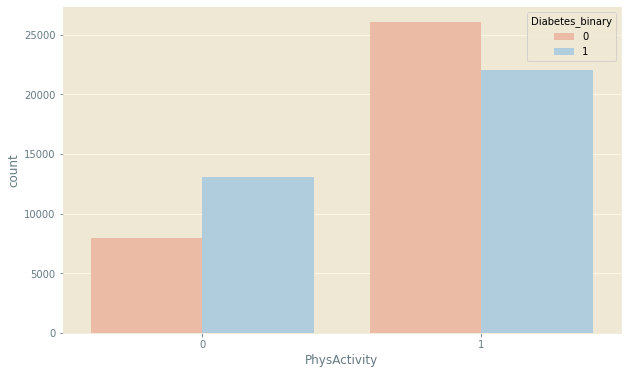

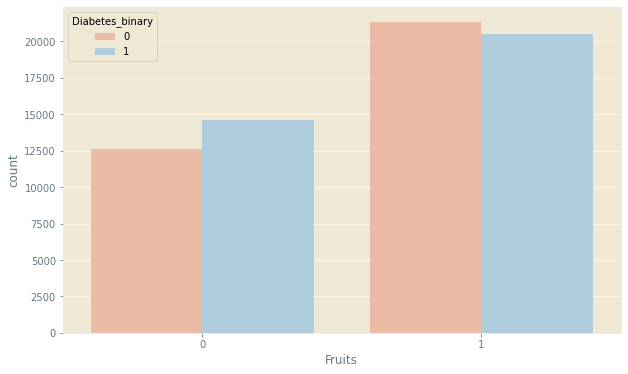

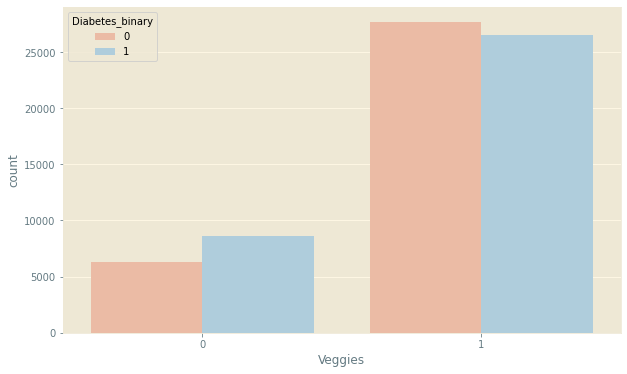

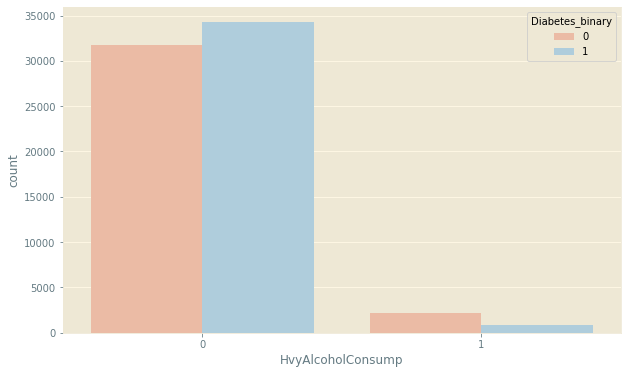

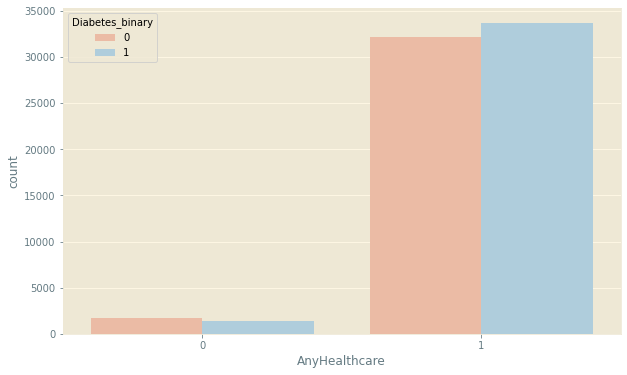

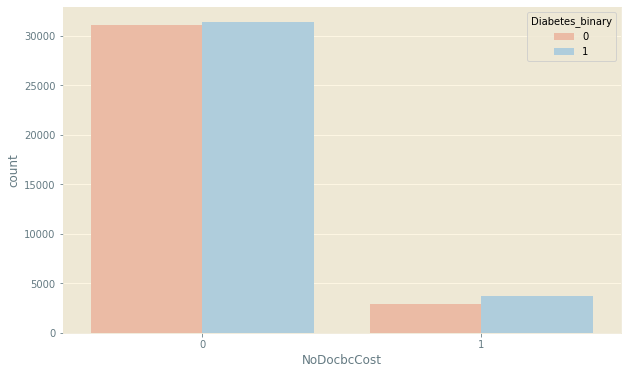

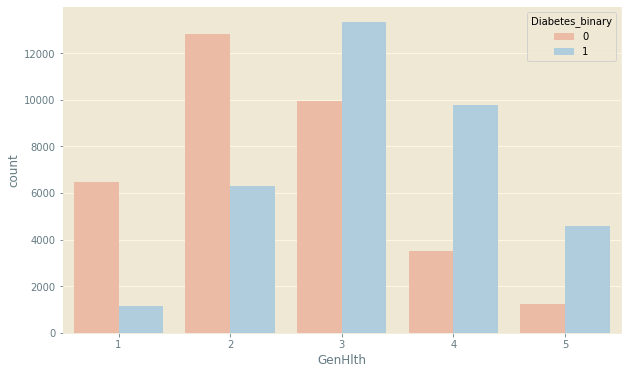

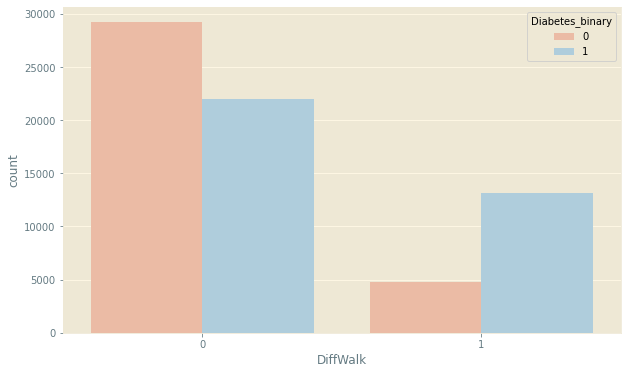

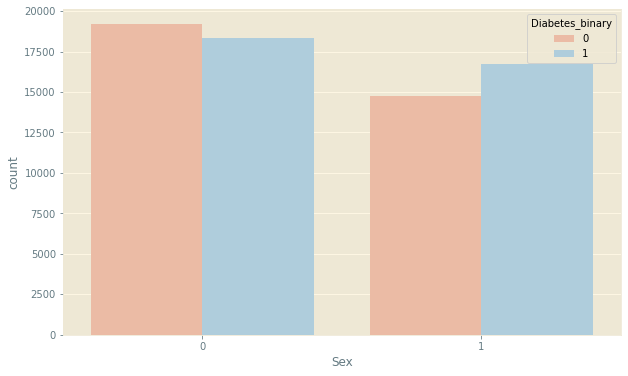

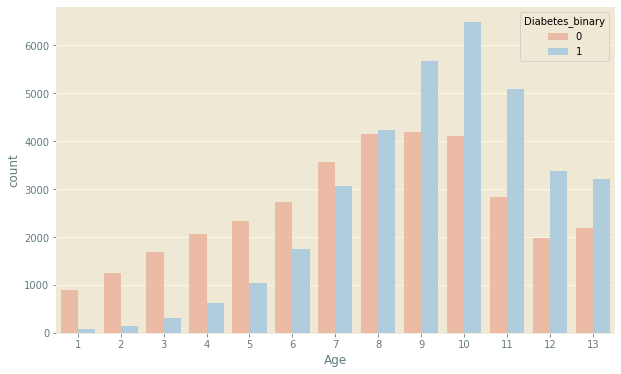

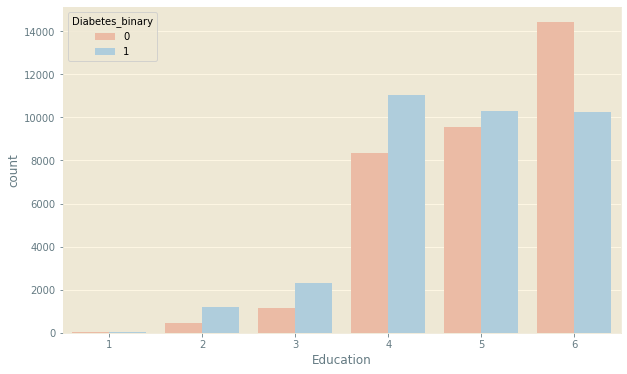

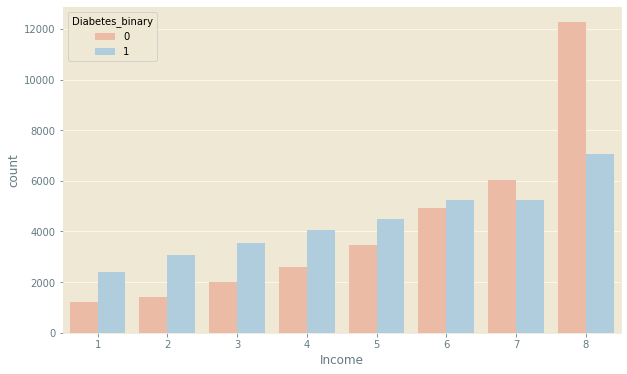

In [21]:
# plotting target variable against independent variables to see relationships
df5 = df[['HighBP', 'HighChol', 'CholCheck', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']] #dataframe for categorical variables 
for r in df5:
  plt.figure(figsize=(10,6))
  sns.countplot(x=df[r], hue='Diabetes_binary', data=df, palette='RdBu')
  plt.show()


- There are more cases of diabetes in respondents who have high blood pressure,have high cholesterol,have checked their cholesterol levels, who are smokers.

- most respondets with diabetes are  above 50 years of age  meaning as one gets older he or she becomes more prone to diabetes condition.

- from the plots bove we can see that among the respondets with high  education level  those with diabetes are fewer than those without, this is so because  the literate respondets have access to information on how to keep healthy lifestyle and feedinghabits which helps them  prevent risk of developing this condition.

- most respondents with high income  don't have diabetes  since they can afford access to better healthcare services and practice healthy lifestyle.

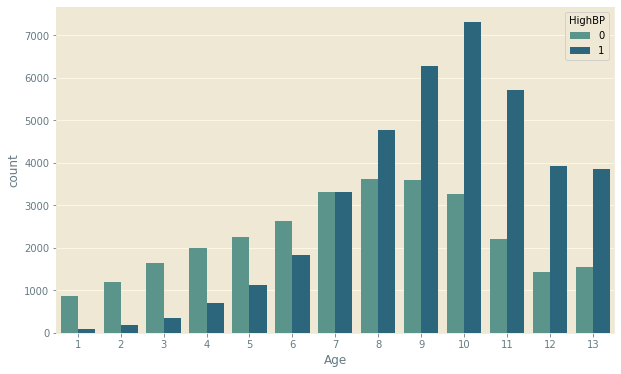

In [22]:
# plotting ages against high blood pressure to see relationships
plt.figure(figsize=(10,6))
sns.countplot(x=df['Age'], hue='HighBP', data=df, palette='crest')
plt.show()

- Occurence of High blood pressure tends to increase with increase in age.

Text(0, 0.5, 'Education')

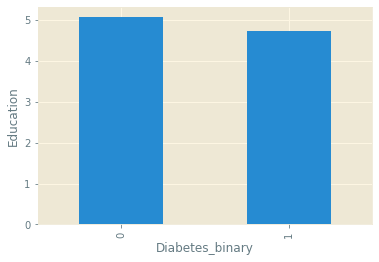

In [23]:
# checking relationship between having diabetes and education levels
df.groupby('Diabetes_binary')['Education'].mean().plot(kind ='bar').set_ylabel(('Education'))

- The more education a respondent has,the lower the chances of having diabetes meaning that learned people are aware of the disease and what to do to reduce it's risk of occurence.

Text(0, 0.5, 'Income')

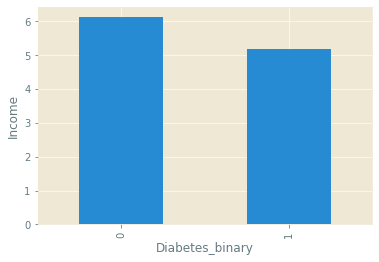

In [24]:
# checking relationship between having diabetes and income earned
df.groupby('Diabetes_binary')['Income'].mean().plot(kind ='bar').set_ylabel(('Income'))

- More people with better income don't have diabetes,as they can afford healthcare hence minimizing it's occurence.

Text(0, 0.5, 'Age')

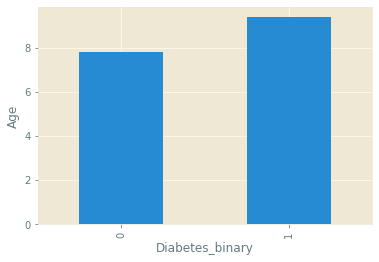

In [25]:
# checking relationship between having diabetes and Age
df.groupby('Diabetes_binary')['Age'].mean().plot(kind ='bar').set_ylabel(('Age'))

- Diabetes risk increases with increase in age

Text(0, 0.5, 'Mental Health')

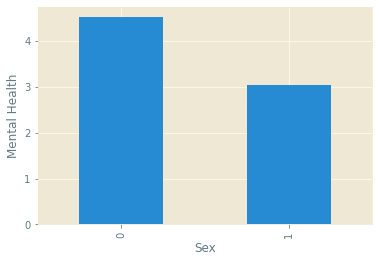

In [26]:
# checking relationship between age and mental/physical health
df.groupby('Sex')['MentHlth'].mean().plot(kind ='bar').set_ylabel(('Mental Health'))

- There are more men with  mental health cases than women

Text(0, 0.5, 'Physical Health')

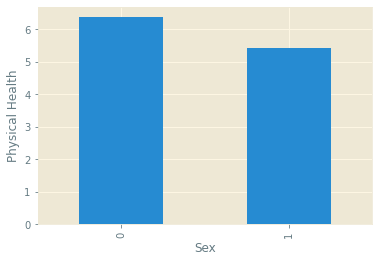

In [27]:
df.groupby('Sex')['PhysHlth'].mean().plot(kind ='bar').set_ylabel(('Physical Health'))

- Women take have better mental and physical health scores than men making them less susceptible to the diabetes risk.

###Using cross tabulation

HvyAlcoholConsump      0     1
Diabetes_binary               
0                  31787  2173
1                  34265   832


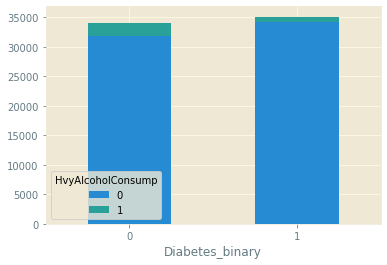

In [28]:
#Cross tabulation between Diabetes_binary and HvyAlcoholConsump
CrosstabResult=pd.crosstab(index=df['Diabetes_binary'],columns=df['HvyAlcoholConsump'])
print(CrosstabResult)
CrosstabResult.plot.bar(stacked=True, rot=0)


From the observation we found that many who consume alcohol and are not diabetic, while those who are diabetic only a few are taking alcohol. This might be those who go against doctors reccomendation that if you are under diabetes medication you should avoid alcohol at all cost.

Income              1     2     3     4     5     6     7      8
Diabetes_binary                                                 
0                1228  1411  1988  2599  3486  4935  6048  12265
1                2383  3086  3564  4047  4489  5260  5226   7042


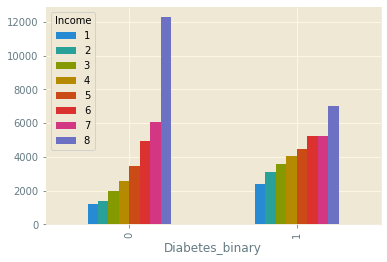

In [29]:
# Cross tabulation between Diabetes_binary and Income
CrosstabResult=pd.crosstab(index=df['Diabetes_binary'],columns=df['Income'])
print(CrosstabResult)
 
# Grouped bar chart between Diabetes_binary and income
CrosstabResult.plot.bar()

Most non diabetic have high income as compared to diabetic. 
This suggets that high cost of medication lowers the individual income. 

Education         1     2     3      4      5      6
Diabetes_binary                                     
0                28   464  1151   8365   9534  14418
1                47  1183  2296  11032  10311  10228


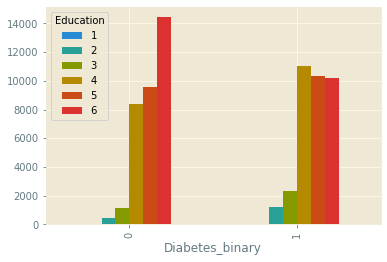

In [30]:
 #Grouped bar chart between Diabetes_binary and Education

CrosstabResult=pd.crosstab(index=df['Diabetes_binary'],columns=df['Education'])
print(CrosstabResult)
 
# Grouped bar chart 

CrosstabResult.plot.bar()

Majority of the respondent who are non diabetic have achieved a high education level as compared to diabetic ones. This shows that medication is given priority over school fees. 

#6.)MODELLING

###Feature engineering 

##a.) Data Preparation and features extraction

  Multicolinearity test

In [31]:
# test for multicolinearity
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [51]:
X = df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,Diabetes_binary,2.850411
1,HighBP,3.172406
2,HighChol,2.530119
3,CholCheck,31.109403
4,BMI,18.780142
5,Smoker,2.054036
6,Stroke,1.165667
7,HeartDiseaseorAttack,1.399870
8,PhysActivity,3.731750
9,Fruits,2.770721


  cholcheck, BMI, EDUCATION, AGE, GenHlth, AnyHealthcare and vegges variables have high mu VIF values meaning they can be predicted by other independent variables.

Fixing multicolinearity

In [52]:
# to drop variables with high VIF values to fix multicolinearity
df1 = df.drop(['CholCheck','BMI','Education','Age','AnyHealthcare','GenHlth','Veggies'],axis=1)
calc_vif(df1)
#'BMI','Education','Age','AnyHealthcare','GenHlth','Veggies'

,variables,VIF
0,Diabetes_binary,2.529263
1,HighBP,2.844658
2,HighChol,2.446528
3,Smoker,1.954256
4,Stroke,1.160239
5,HeartDiseaseorAttack,1.372411
6,PhysActivity,3.255508
7,Fruits,2.461093
8,HvyAlcoholConsump,1.070123
9,NoDocbcCost,1.155583


###B).Splitting the dataset into target and labels 

In [54]:
# Extracting the  target variable
X = df1.drop(['Diabetes_binary'], axis=1)

y = df1['Diabetes_binary']

#splitting data to train and validation set using 80% as training set and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=200, shuffle=True, )

In [55]:
# feature scaling
from sklearn.preprocessing import StandardScaler

# Create an instance of the scaler and apply it to the data
sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

###C.) Hyper parameter tunning and model selection 

In [ ]:

hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)
from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [ ]:
# calling fit
gd_sr.fit(X_train, y_train)

In [ ]:
#best_result = gd_sr.best_score_
print(best_result)

### KNN

In [56]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [57]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

In [58]:
# model evaluation
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4463 2323]
 [2216 4810]]
              precision    recall  f1-score   support

           0       0.67      0.66      0.66      6786
           1       0.67      0.68      0.68      7026

    accuracy                           0.67     13812
   macro avg       0.67      0.67      0.67     13812
weighted avg       0.67      0.67      0.67     13812



KNN  gives accuracy of  67%

### NAIVE BAYES

Bernoulli naive Bayes  algorythm is chosen because our dataet is binary valued

In [59]:

# Load libraries and datasets to be used in this example
#
from sklearn import datasets
from sklearn.naive_bayes import BernoulliNB


In [61]:
 #Training our model
# 
clf = BernoulliNB()
# model score
model = clf.fit(X_train, y_train) 

In [62]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.6975094121054156


In [64]:
df1.head()

,Diabetes_binary,HighBP,HighChol,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,HvyAlcoholConsump,NoDocbcCost,MentHlth,PhysHlth,DiffWalk,Sex,Income
0,0,1,0,0,0,0,1,0,0,0,5,30,0,1,8
1,0,1,1,1,1,0,0,1,0,0,0,0,0,1,8
2,0,0,0,0,0,0,1,1,0,0,0,10,0,1,8
3,0,1,1,1,0,0,1,1,0,0,0,3,0,1,8
4,0,0,0,1,0,0,1,1,0,0,0,0,0,0,8


In [68]:
# Predicting a new observation
new_observation = [[0,0,1,1,0,1,1,0,0,0,0,0,0,8]]

new_prediction = model.predict(new_observation)
new_prediction

array([0])

Naive Bayes  gives accuracy of 69.7%



SVM

In [69]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.decomposition import PCA


In [71]:
#Building the model 
rbfclassifier = SVC(kernel='rbf',degree=3,gamma='auto')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(gamma='auto')

In [72]:
# making prediction
y_pred = rbfclassifier.predict(X_test)

In [73]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7074283231972198
[[4504 2282]
 [1759 5267]]


SVM  gives accuracy of  70% , we used rbf parameter beacuse it is  uses kernel tricks  hence higher accuracy.

### logistic regression

In [77]:
# to create an instance of the classifie
LogReg_clf = LogisticRegression(random_state = 0)

# model fit it to the training data
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [78]:
# making predictions
y_pred = classifier.predict(X_test)

In [79]:
# evaluating or model
from sklearn.metrics import confusion_matrix, accuracy_score


acc =  accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)


print(acc)

print(cm)

0.671372719374457
[[4463 2323]
 [2216 4810]]


 - logistic regression has accuracy of 67%, it has 4463 and 4810 correct calssifications and false predions or misclassifications are  2216 and 2323.

### NEURAL NETWORK

In [80]:
# Import an Multi-Layer Perceptron Classifier model estimator from Scikit-Learn's neural_network library
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report,confusion_matrix

In [81]:
# model building
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), activation='relu', random_state=10, max_iter=500,learning_rate='adaptive')

# fitting the data
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(30, 30, 30), learning_rate='adaptive',
              max_iter=500, random_state=10)

In [82]:
# Predicting
y_pred = mlp.predict(X_test)

# Evaluation
print(confusion_matrix(y_test,y_pred))

print('-----------------------------------------')

print(classification_report(y_test,y_pred))

[[4503 2283]
 [1875 5151]]
-----------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.66      0.68      6786
           1       0.69      0.73      0.71      7026

    accuracy                           0.70     13812
   macro avg       0.70      0.70      0.70     13812
weighted avg       0.70      0.70      0.70     13812



multylayerperception neural newtwork model gives and accuaracy of 70%

##Decision tree

In [83]:
from sklearn.tree import DecisionTreeClassifier
# Create a decision tree classifier

# tree = DecisionTreeClassifier()
# # Train it on our training set.
# tree = tree.fit(X_train, y_train
#      # Predict based on the model we've trained
# y_pred = tree.predict(X_test)           

from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [84]:
#metrics
from sklearn import metrics
print(accuracy_score(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))
print(precision_score(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

0.645742832319722
[[4571 2215]
 [2678 4348]]
0.6625019046167911
              precision    recall  f1-score   support

           0       0.63      0.67      0.65      6786
           1       0.66      0.62      0.64      7026

    accuracy                           0.65     13812
   macro avg       0.65      0.65      0.65     13812
weighted avg       0.65      0.65      0.65     13812



In [85]:
model=DecisionTreeClassifier()
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
grid_search = GridSearchCV(estimator=model, 
                           param_grid=params, 
                           cv=4, n_jobs=1, verbose=1, scoring = "accuracy")

In [86]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [87]:

# Fitting grid search
best_clf = grid_search.fit(X_train, y_train)
#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)
print('Best Max_depth:', best_clf.best_estimator_.get_params()['max_depth'])
print('Best Min_samples:', best_clf.best_estimator_.get_params()['min_samples_leaf'])
print('Best criterion:', best_clf.best_estimator_.get_params()['criterion'])
print('best_score',best_clf.best_score_)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Best Max_depth: 10
Best Min_samples: 100
Best criterion: entropy
best_score 0.7078649442266846


In [88]:
#Model Selection using the best parameters:
model = DecisionTreeClassifier(max_depth=10, min_samples_split=100, criterion='entropy',random_state=0)

#Fitting the model:
model.fit(X_train,y_train )

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=100,
                       random_state=0)

In [90]:
# model predictions
y_pred=model.predict(X_test)


In [91]:
# model evaluation
y_pred=model.predict(X_test)
Dec= accuracy_score(y_test, y_test_pred)
print(accuracy_score(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))
print(precision_score(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

0.645742832319722
[[4571 2215]
 [2678 4348]]
0.6625019046167911
              precision    recall  f1-score   support

           0       0.63      0.67      0.65      6786
           1       0.66      0.62      0.64      7026

    accuracy                           0.65     13812
   macro avg       0.65      0.65      0.65     13812
weighted avg       0.65      0.65      0.65     13812



In [92]:
#Checking the accuracy of the test and train models:

print(f'Train Accuracy: {model.score(X_train, y_train)*100:.2f}'+ " %")
print(f'Test Accuracy: {model.score(X_test, y_test)*100:.2f}'+ " %")

Train Accuracy: 71.85 %
Test Accuracy: 70.50 %


decision tree model nhas accuracy of  65%.

- Neural network and  svm have accuracy levels of 70% thus both well performing. 

#7).Conclusion 

1. High Blood Pressure, BMI, Smoking, stroke and heart Disease or Attack are major health indicators that contributes to one having diabetes.

2. Most non diabetic have high income as compared to diabetic. This suggets that high cost of medication lowers the individual income

3. Majority of the respondent who are non diabetic have achieved a high education level as compared to diabetic ones. This shows that medication is given priority over school fees.

4. Those who consume alcohol are not diabetic, while those who are diabetic only a few are taking alcohol. 
This might be those who go against doctors reccomendation that if you are under diabetes medication you should avoid alcohol at all cost.

##8). Recommendations

1. Health awareness campaigns to educate the general public on the major health indicators that shows the likelyhood of having diabetes.

2. Diabetes medication should be subsidised to allow the family members and the ones affected to priorities on school fees.

